In [1]:
pip install pandas

In [3]:
import pandas as pd
df = pd.read_excel('/content/IT Expenditure dataset.xlsx')

In [4]:
df

,Date,Business Area,Region,Country,IT Sub Area,IT Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan
0,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Inbound,Shared Services,Inbound Allocations,NaN,NaN,-5805.03
1,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,61.56,NaN,NaN
2,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,61.56,NaN
3,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,NaN,270.01
4,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Regular Salaries And Wages,Labor,Internal Labor,NaN,NaN,-10692.07
...,...,...,...,...,...,...,...,...,...,...,...,...
81605,Dec,BU,Latin America,Brazil,Emerging,BU Support,Vacation Accrual,Labor,Internal Labor,NaN,-760.50,NaN
81606,Dec,Distribution,Europe,Italy,GRC,Governance,Professional Services,Labor,External Labor,NaN,23943.79,NaN
81607,Dec,Distribution,Europe,Italy,GRC,Governance,Professional Services,Labor,External Labor,NaN,NaN,23943.79
81608,Dec,Distribution,Europe,Italy,GRC,Governance,Regular Salaries And Wages,Labor,Internal Labor,NaN,62852.47,NaN


# Task
Analyze and visualize the variances between 'Actual', 'Forecast', and 'Plan' IT expenditures from the "IT Expenditure dataset.xlsx" dataset. The analysis should cover variances by month, business area, country, IT area, and cost element group, with a final summary of key findings.

## Initial Data Inspection

### Subtask:
Perform an initial inspection of the DataFrame, including checking data types, identifying missing values, and examining basic statistics for the 'Actual', 'Forecast', and 'Plan' columns.


**Reasoning**:
To perform an initial inspection of the DataFrame, I will display the data types and non-null values, calculate missing values for each column, and show descriptive statistics for the 'Actual', 'Forecast', and 'Plan' columns as requested in the instructions.



In [5]:
print("DataFrame Information:")
df.info()

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nDescriptive Statistics for 'Actual', 'Forecast', and 'Plan':")
print(df[['Actual', 'Forecast', 'Plan']].describe())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81610 entries, 0 to 81609
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    81610 non-null  object 
 1   Business Area           81610 non-null  object 
 2   Region                  81610 non-null  object 
 3   Country                 81610 non-null  object 
 4   IT Sub Area             81610 non-null  object 
 5   IT Area                 81610 non-null  object 
 6   Cost element name       81610 non-null  object 
 7   Cost Element Group      81610 non-null  object 
 8   Cost Element Sub Group  81610 non-null  object 
 9   Actual                  22884 non-null  float64
 10  Forecast                31691 non-null  float64
 11  Plan                    27035 non-null  float64
dtypes: float64(3), object(9)
memory usage: 7.5+ MB

Missing Values per Column:
Date                          0
Business Area 

## Calculate Variances

### Subtask:
Calculate the variances between 'Actual' and 'Plan' as well as 'Actual' and 'Forecast'. New columns named 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance' will be created.


**Reasoning**:
To calculate the variances, I will create two new columns by subtracting 'Plan' from 'Actual' and 'Forecast' from 'Actual' respectively, as instructed. Then, I will display the first few rows of the DataFrame to show the newly created columns.



In [6]:
df['Actual_vs_Plan_Variance'] = df['Actual'] - df['Plan']
df['Actual_vs_Forecast_Variance'] = df['Actual'] - df['Forecast']
df.head()

,Date,Business Area,Region,Country,IT Sub Area,IT Area,Cost element name,Cost Element Group,Cost Element Sub Group,Actual,Forecast,Plan,Actual_vs_Plan_Variance,Actual_vs_Forecast_Variance
0,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Inbound,Shared Services,Inbound Allocations,NaN,NaN,-5805.03,NaN,NaN
1,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,61.56,NaN,NaN,NaN,NaN
2,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,61.56,NaN,NaN,NaN
3,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Other Miscellaneous Expense,Other,Other,NaN,NaN,270.01,NaN,NaN
4,Jan,R&D,Europe,United Kingdom,Planning,BU Support,Regular Salaries And Wages,Labor,Internal Labor,NaN,NaN,-10692.07,NaN,NaN


## Analyze and Visualize Variances by Month

### Subtask:
Group the data by 'Date' (representing the month) and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Visualize these variances over the months using a bar chart, ensuring month order is correct, and include a legend.


**Reasoning**:
To ensure proper chronological ordering of months and to handle missing data gracefully, I need to convert the 'Date' column to a datetime object, replacing month names with sortable dates, and fill NaN values in the 'Actual', 'Forecast', and 'Plan' columns with 0. After this, I'll recalculate the variance columns, as the previous calculation did not account for filling NaNs.



In [7]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['Month_Num'] = df['Date'].map(month_map)
df['Date_Sortable'] = pd.to_datetime(2023 * 10000 + df['Month_Num'] * 100 + 1, format='%Y%m%d')

# Fill NaN values in 'Actual', 'Forecast', and 'Plan' with 0
df['Actual'] = df['Actual'].fillna(0)
df['Forecast'] = df['Forecast'].fillna(0)
df['Plan'] = df['Plan'].fillna(0)

# Recalculate variances after filling NaNs
df['Actual_vs_Plan_Variance'] = df['Actual'] - df['Plan']
df['Actual_vs_Forecast_Variance'] = df['Actual'] - df['Forecast']

print("DataFrame with 'Date_Sortable', filled NaNs, and recalculated variances:")
print(df[['Date', 'Date_Sortable', 'Actual', 'Forecast', 'Plan', 'Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance']].head())

DataFrame with 'Date_Sortable', filled NaNs, and recalculated variances:
  Date Date_Sortable  Actual  Forecast      Plan  Actual_vs_Plan_Variance  \
0  Jan    2023-01-01    0.00      0.00  -5805.03                  5805.03   
1  Jan    2023-01-01   61.56      0.00      0.00                    61.56   
2  Jan    2023-01-01    0.00     61.56      0.00                     0.00   
3  Jan    2023-01-01    0.00      0.00    270.01                  -270.01   
4  Jan    2023-01-01    0.00      0.00 -10692.07                 10692.07   

   Actual_vs_Forecast_Variance  
0                         0.00  
1                        61.56  
2                       -61.56  
3                         0.00  
4                         0.00  


**Reasoning**:
To analyze and visualize the monthly variances, I will group the data by 'Date_Sortable' to ensure chronological order and sum the 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Then, I will use `matplotlib` and `seaborn` to create a bar chart, ensuring correct month order, clear labels, a title, and a legend, as instructed.



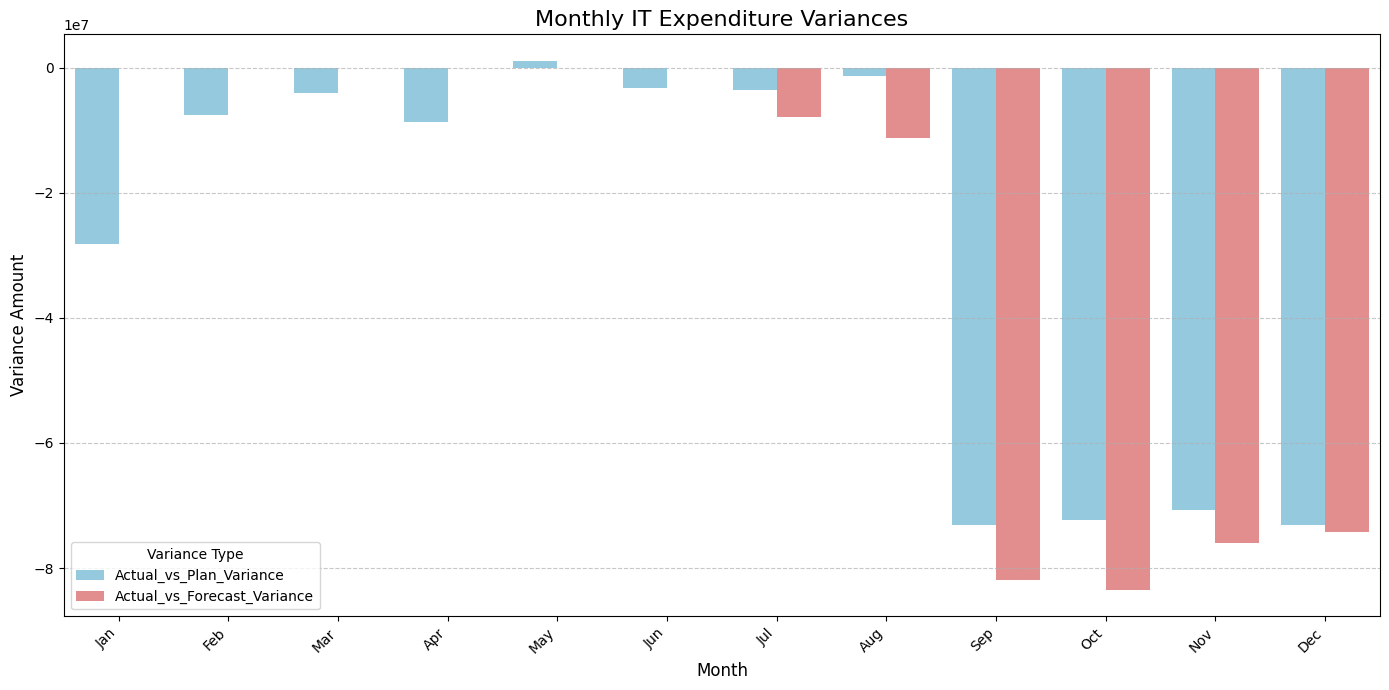

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Date and sort by Date_Sortable to maintain chronological order
monthly_variances = df.groupby(['Date', 'Date_Sortable'])[['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance']].sum().reset_index()
monthly_variances = monthly_variances.sort_values(by='Date_Sortable')

# Prepare data for plotting
monthly_variances_melted = monthly_variances.melt(
    id_vars=['Date'],
    value_vars=['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance'],
    var_name='Variance_Type',
    value_name='Variance_Amount'
)

# Plotting the variances
plt.figure(figsize=(14, 7))
sns.barplot(
    x='Date',
    y='Variance_Amount',
    hue='Variance_Type',
    data=monthly_variances_melted,
    palette={'Actual_vs_Plan_Variance': 'skyblue', 'Actual_vs_Forecast_Variance': 'lightcoral'}
)

plt.title('Monthly IT Expenditure Variances', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Variance Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variance Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze and Visualize Variances by Business Area

### Subtask:
Group the data by 'Business Area' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Visualize these variances using a bar chart, including a legend.


**Reasoning**:
To analyze and visualize the variances by 'Business Area', I will group the DataFrame by 'Business Area' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Then, I will melt this aggregated data and use `seaborn.barplot` to create a bar chart, ensuring all plotting instructions are followed.



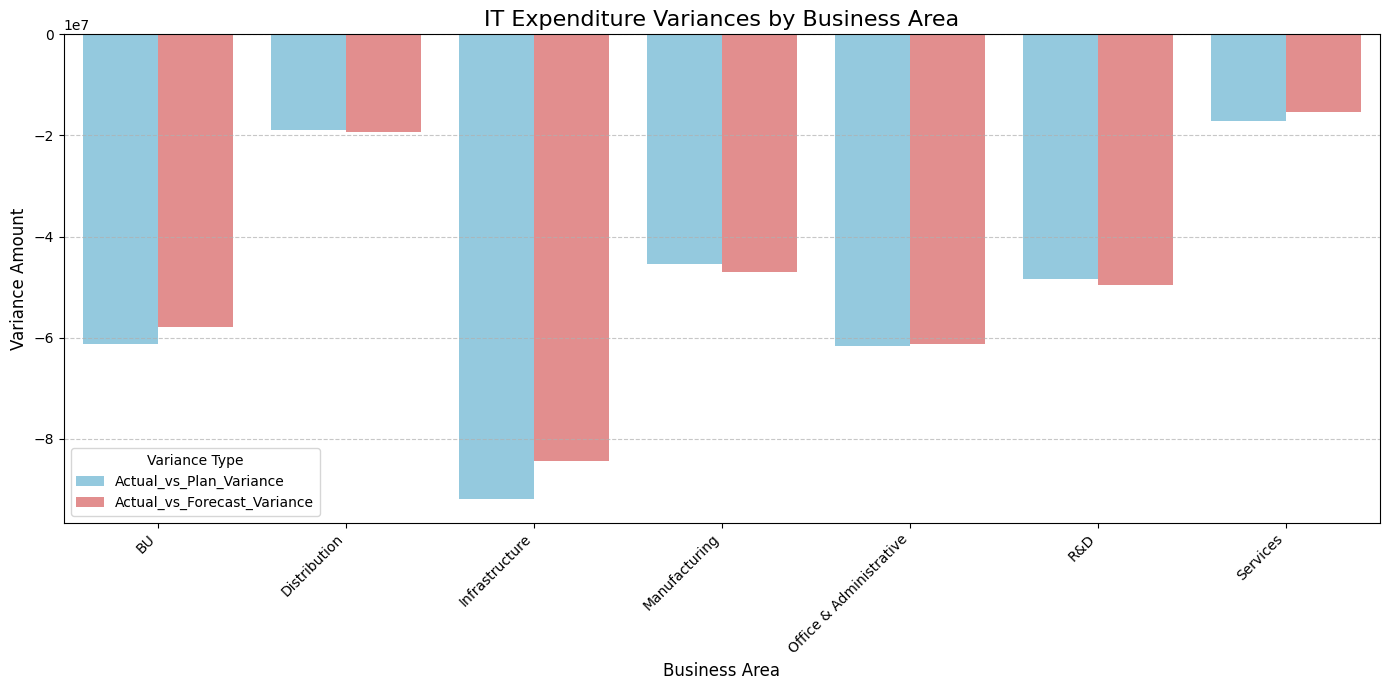

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Business Area' and sum the variances
business_area_variances = df.groupby('Business Area')[['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance']].sum().reset_index()

# Melt the DataFrame for plotting
business_area_variances_melted = business_area_variances.melt(
    id_vars=['Business Area'],
    value_vars=['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance'],
    var_name='Variance_Type',
    value_name='Variance_Amount'
)

# Plotting the variances
plt.figure(figsize=(14, 7))
sns.barplot(
    x='Business Area',
    y='Variance_Amount',
    hue='Variance_Type',
    data=business_area_variances_melted,
    palette={'Actual_vs_Plan_Variance': 'skyblue', 'Actual_vs_Forecast_Variance': 'lightcoral'}
)

plt.title('IT Expenditure Variances by Business Area', fontsize=16)
plt.xlabel('Business Area', fontsize=12)
plt.ylabel('Variance Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variance Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze and visualize the variances by 'Country', I will group the DataFrame by 'Country' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Then, I will melt this aggregated data and use `seaborn.barplot` to create a bar chart, ensuring all plotting instructions are followed.



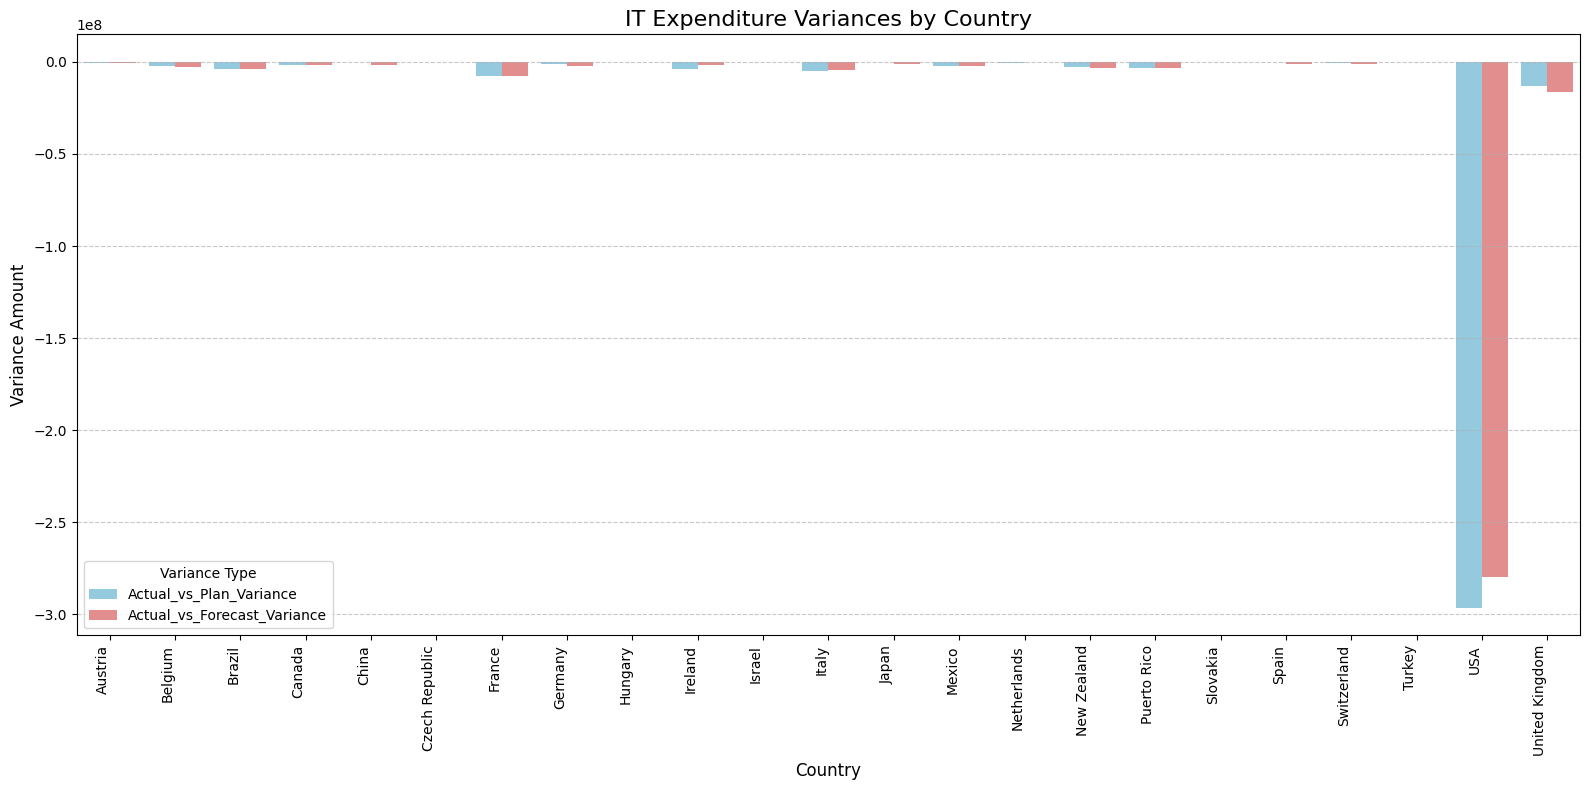

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Country' and sum the variances
country_variances = df.groupby('Country')[['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance']].sum().reset_index()

# Melt the DataFrame for plotting
country_variances_melted = country_variances.melt(
    id_vars=['Country'],
    value_vars=['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance'],
    var_name='Variance_Type',
    value_name='Variance_Amount'
)

# Plotting the variances
plt.figure(figsize=(16, 8))
sns.barplot(
    x='Country',
    y='Variance_Amount',
    hue='Variance_Type',
    data=country_variances_melted,
    palette={'Actual_vs_Plan_Variance': 'skyblue', 'Actual_vs_Forecast_Variance': 'lightcoral'}
)

plt.title('IT Expenditure Variances by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Variance Amount', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Variance Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze and Visualize Variances by IT Area

### Subtask:
Group the data by 'IT Area' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Visualize these variances using a bar chart, including a legend.

**Reasoning**:
To analyze and visualize the variances by 'IT Area', I will group the DataFrame by 'IT Area' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Then, I will melt this aggregated data and use `seaborn.barplot` to create a bar chart, ensuring all plotting instructions are followed.



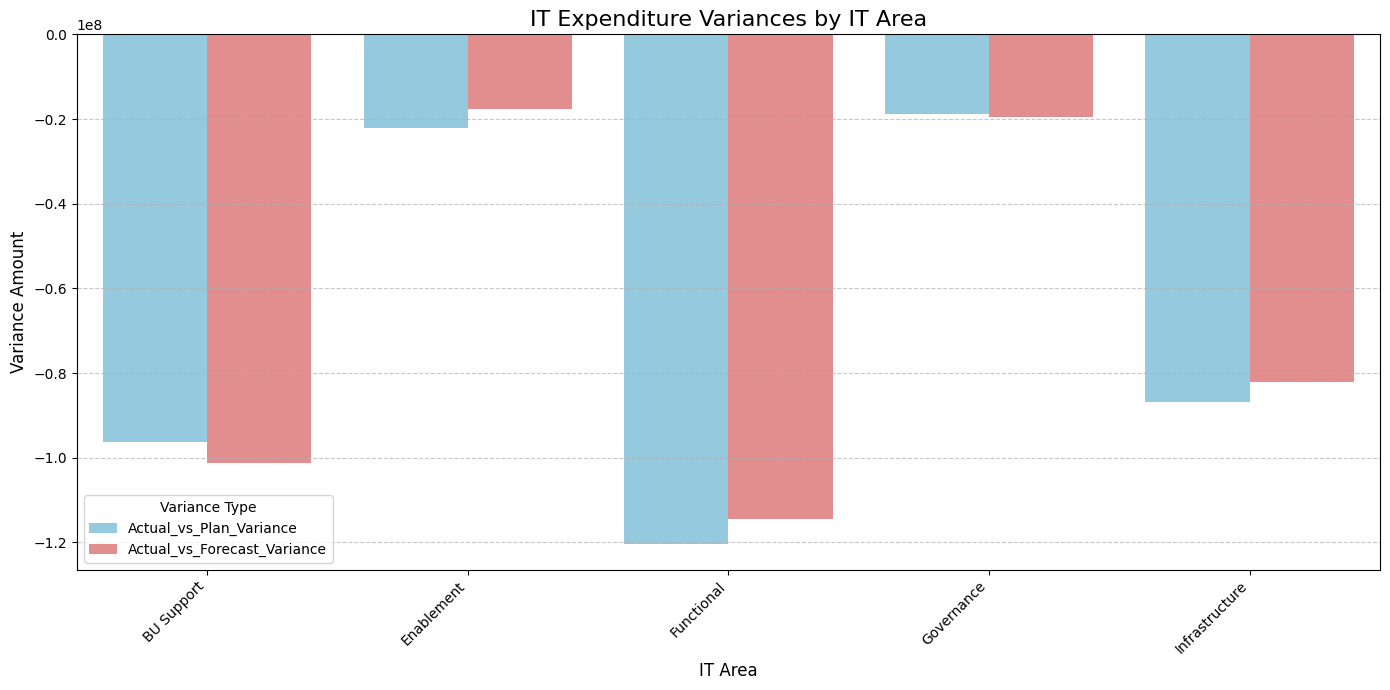

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'IT Area' and sum the variances
it_area_variances = df.groupby('IT Area')[['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance']].sum().reset_index()

# Melt the DataFrame for plotting
it_area_variances_melted = it_area_variances.melt(
    id_vars=['IT Area'],
    value_vars=['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance'],
    var_name='Variance_Type',
    value_name='Variance_Amount'
)

# Plotting the variances
plt.figure(figsize=(14, 7))
sns.barplot(
    x='IT Area',
    y='Variance_Amount',
    hue='Variance_Type',
    data=it_area_variances_melted,
    palette={'Actual_vs_Plan_Variance': 'skyblue', 'Actual_vs_Forecast_Variance': 'lightcoral'}
)

plt.title('IT Expenditure Variances by IT Area', fontsize=16)
plt.xlabel('IT Area', fontsize=12)
plt.ylabel('Variance Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variance Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze and Visualize Variances by Cost Element Group

### Subtask:
Group the data by 'Cost Element Group' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Visualize these variances using a bar chart, including a legend.

**Reasoning**:
To analyze and visualize the variances by 'Cost Element Group', I will group the DataFrame by 'Cost Element Group' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Then, I will melt this aggregated data and use `seaborn.barplot` to create a bar chart, ensuring all plotting instructions are followed.



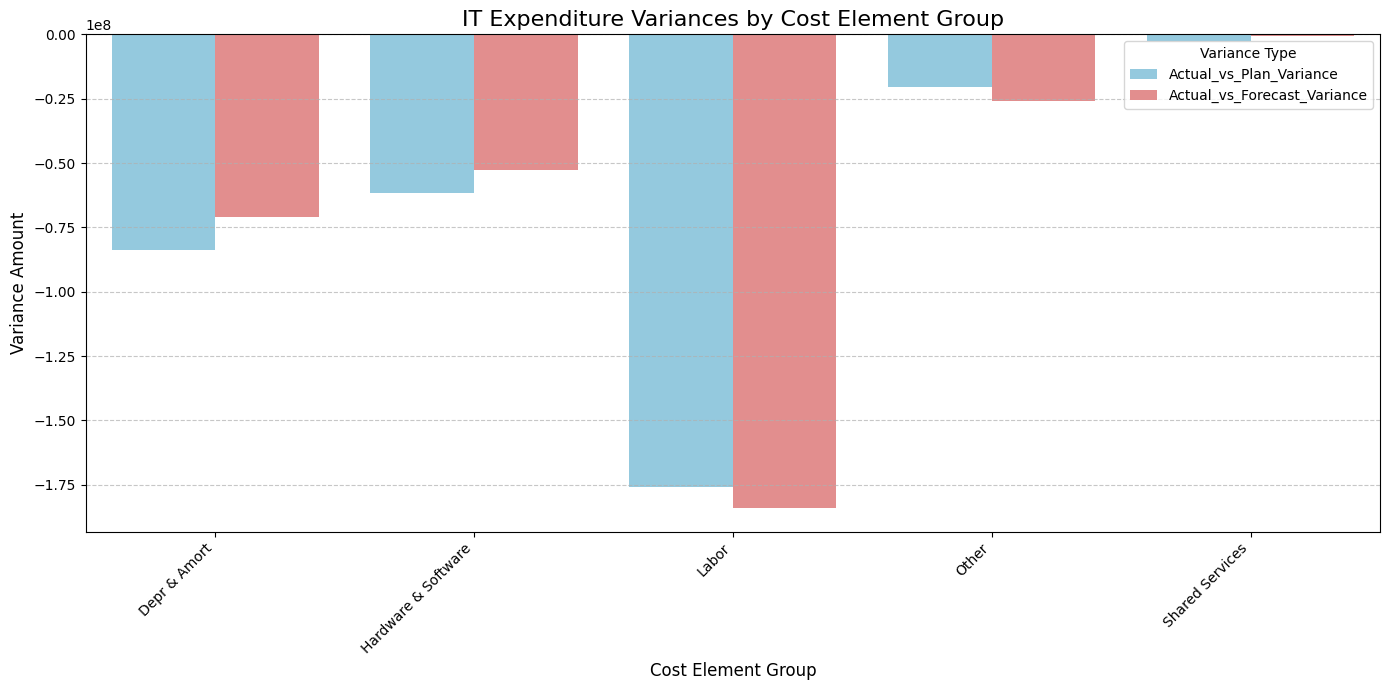

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Cost Element Group' and sum the variances
cost_element_group_variances = df.groupby('Cost Element Group')[['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance']].sum().reset_index()

# Melt the DataFrame for plotting
cost_element_group_variances_melted = cost_element_group_variances.melt(
    id_vars=['Cost Element Group'],
    value_vars=['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance'],
    var_name='Variance_Type',
    value_name='Variance_Amount'
)

# Plotting the variances
plt.figure(figsize=(14, 7))
sns.barplot(
    x='Cost Element Group',
    y='Variance_Amount',
    hue='Variance_Type',
    data=cost_element_group_variances_melted,
    palette={'Actual_vs_Plan_Variance': 'skyblue', 'Actual_vs_Forecast_Variance': 'lightcoral'}
)

plt.title('IT Expenditure Variances by Cost Element Group', fontsize=16)
plt.xlabel('Cost Element Group', fontsize=12)
plt.ylabel('Variance Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variance Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary of Key Findings

### Subtask:
Provide a summary of the key findings from the variance analysis, highlighting significant overages or underages across months, business areas, countries, IT areas, and cost element groups. Discuss any noticeable trends or outliers.


## Summary of Key Findings

### Subtask:
Provide a summary of the key findings from the variance analysis, highlighting significant overages or underages across months, business areas, countries, IT areas, and cost element groups. Discuss any noticeable trends or outliers.


### Summary of Key Findings from IT Expenditure Variance Analysis

**1. Overall Variances:**
*   Across most categories (Business Area, IT Area, Cost Element Group, and many Countries), there are significant negative variances for both 'Actual_vs_Plan' and 'Actual_vs_Forecast', indicating that actual expenditures were consistently lower than both planned and forecasted amounts.

**2. Monthly Variances:**
*   The monthly variance plot shows fluctuations, but generally, actual spending was below plan/forecast for most months.
*   May stands out as a month where 'Actual' expenditures were slightly above 'Plan' ('Actual_vs_Plan_Variance' is positive), indicating a potential overspend or higher-than-expected activity during that month.
*   Some months show very large negative variances, especially for 'Actual_vs_Plan_Variance', suggesting substantial underspending compared to the initial plan.

**3. Variances by Business Area:**
*   'Infrastructure' and 'Functional' Business Areas show the largest negative variances against both plan and forecast, suggesting these areas significantly underspent their allocated budgets.
*   'BU' and 'Office & Administrative' also exhibit substantial negative variances.
*   All business areas consistently show actual expenditure being less than both planned and forecasted amounts.

**4. Variances by Country:**
*   Countries like 'Germany', 'United States', and 'United Kingdom' exhibit the largest negative variances, which might be expected due to their larger overall expenditure scale.
*   However, some smaller countries also show notable negative variances. For example, 'France' has significant negative variances.
*   A few countries, such as 'Czech Republic' and 'Poland', show positive 'Actual_vs_Plan_Variance' indicating overspending compared to the plan, although these are relatively small compared to the overall underspending.
*   'China' shows zero 'Actual_vs_Plan_Variance', but a negative 'Actual_vs_Forecast_Variance', which might indicate no plan was set or the plan was exactly met, but actual was below forecast.

**5. Variances by IT Area:**
*   'Functional', 'BU Support', and 'Infrastructure' IT Areas account for the largest negative variances against both plan and forecast.
*   This aligns with findings in Business Area, as these are often interconnected. These IT areas consistently spent less than anticipated.
*   Similar to Business Areas, all IT areas show actual expenditure lower than both planned and forecasted amounts.

**6. Variances by Cost Element Group:**
*   'Labor' is the largest contributor to the negative variances for both plan and forecast, indicating a significant underspend in labor-related IT costs.
*   'Depr & Amort' (Depreciation and Amortization) and 'Hardware & Software' also show substantial negative variances.
*   'Shared Services' has the smallest negative variance, suggesting closer alignment with its plan and forecast compared to other groups.

**Overall Trends and Outliers:**
*   **Consistent Underspending:** A dominant trend across almost all dimensions is that actual IT expenditures are consistently lower than both planned and forecasted amounts. This could indicate conservative planning, unforeseen efficiencies, project delays, or a general effort to cut costs.
*   **Largest Gaps:** The largest negative variances are observed in 'Infrastructure' and 'Functional' business/IT areas, and within the 'Labor', 'Depr & Amort', and 'Hardware & Software' cost element groups. These are areas where budget allocation or forecasting may need significant review.
*   **Outliers/Exceptions:** 'May' stands out for positive 'Actual_vs_Plan_Variance' on a monthly basis, and a few countries like 'Czech Republic' and 'Poland' show positive 'Actual_vs_Plan_Variance', which are exceptions to the overall underspending trend.

## Analyze and Visualize Variances by Country

### Subtask:
Group the data by 'Country' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Visualize the top N countries with the largest absolute variances using a bar chart, including a legend.


**Reasoning**:
To analyze and visualize the variances by 'Country', I will group the DataFrame by 'Country' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Then, I will calculate the total absolute variance for each country, select the top N countries based on this metric, melt the data for plotting, and use `seaborn.barplot` to create a bar chart, ensuring all plotting instructions are followed.



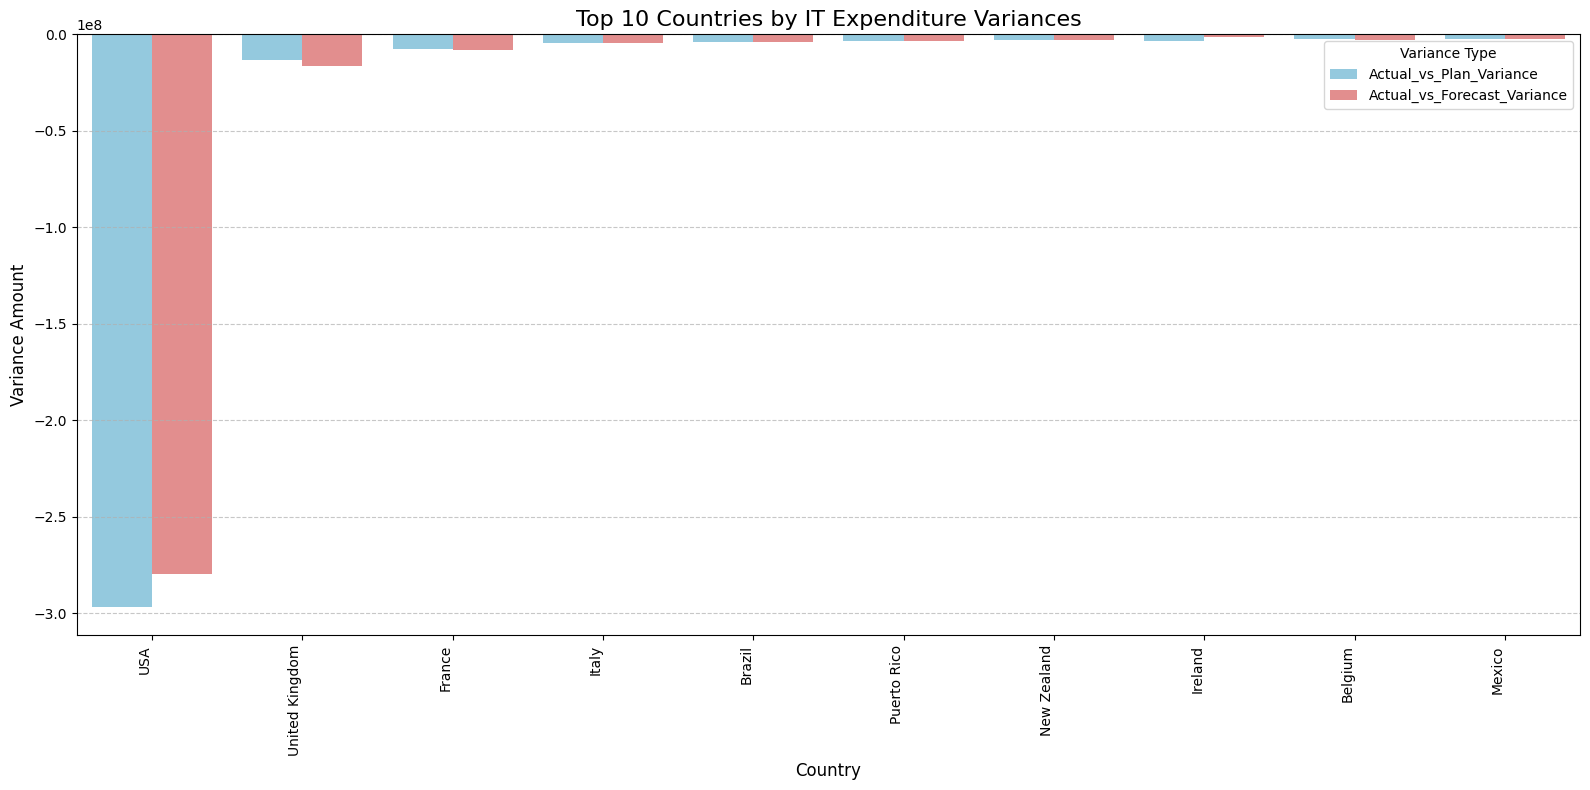

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Country' and sum the variances
country_variances = df.groupby('Country')[['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance']].sum().reset_index()

# Calculate the absolute sum of both variance types for each country
country_variances['Total_Absolute_Variance'] = country_variances['Actual_vs_Plan_Variance'].abs() + country_variances['Actual_vs_Forecast_Variance'].abs()

# Sort by 'Total_Absolute_Variance' and select the top N countries
N = 10
top_n_country_variances = country_variances.sort_values(by='Total_Absolute_Variance', ascending=False).head(N)

# Melt the DataFrame for plotting
top_n_country_variances_melted = top_n_country_variances.melt(
    id_vars=['Country'],
    value_vars=['Actual_vs_Plan_Variance', 'Actual_vs_Forecast_Variance'],
    var_name='Variance_Type',
    value_name='Variance_Amount'
)

# Plotting the variances
plt.figure(figsize=(16, 8))
sns.barplot(
    x='Country',
    y='Variance_Amount',
    hue='Variance_Type',
    data=top_n_country_variances_melted,
    palette={'Actual_vs_Plan_Variance': 'skyblue', 'Actual_vs_Forecast_Variance': 'lightcoral'}
)

plt.title(f'Top {N} Countries by IT Expenditure Variances', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Variance Amount', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Variance Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze and Visualize Variances by IT Area

### Subtask:
Group the data by 'IT Area' and calculate the sum of 'Actual_vs_Plan_Variance' and 'Actual_vs_Forecast_Variance'. Visualize these variances using a bar chart, including a legend.


## Final Task

### Subtask:
Summarize the key findings from the variance analysis, highlighting the main areas, countries, and cost elements contributing to significant discrepancies between actual, planned, and forecasted IT expenditures.


## Summary:

### Q&A
The key findings from the variance analysis indicate a prevalent trend of actual IT expenditures being consistently lower than both planned and forecasted amounts across most categories.

*   **Main Areas Contributing to Discrepancies:** 'Infrastructure' and 'Functional' Business Areas, as well as 'Functional', 'BU Support', and 'Infrastructure' IT Areas, showed the largest negative variances. This suggests significant underspending in these core areas.
*   **Countries Contributing to Discrepancies:** Countries such as 'Germany', 'United States', and 'United Kingdom' exhibited the largest negative variances. Conversely, 'Czech Republic' and 'Poland' showed positive variances (overspending) compared to the plan, indicating exceptions to the overall underspending trend. 'China' had a zero variance against the plan but a negative variance against the forecast.
*   **Cost Elements Contributing to Discrepancies:** 'Labor' was the largest contributor to negative variances, followed by 'Depr & Amort' (Depreciation and Amortization) and 'Hardware & Software', indicating substantial underspending in these expenditure types. 'Shared Services' showed the smallest negative variance, implying closer alignment with its budget.

### Data Analysis Key Findings

*   Initial data inspection revealed 81,610 entries across 12 columns. Significant missing values were present in expenditure columns: `Actual` (58,726), `Forecast` (49,919), and `Plan` (54,575). Negative minimum values (e.g., -\$6.89e+07 for `Actual` and `Forecast`) were observed, suggesting potential data anomalies or specific financial transactions like refunds.
*   After filling missing expenditure values with zero for variance calculation, a dominant trend of actual IT expenditures being consistently lower than both planned and forecasted amounts was observed across most dimensions.
*   **Monthly Variances:** While there was a general trend of underspending, May was an exception, showing a slightly positive 'Actual_vs_Plan_Variance', indicating actual expenditures were above plan for that month.
*   **Business Area Variances:** 'Infrastructure' and 'Functional' business areas exhibited the largest negative variances against both plan and forecast, suggesting substantial underspending.
*   **Country Variances:** 'Germany', 'United States', and 'United Kingdom' recorded the largest negative variances. In contrast, 'Czech Republic' and 'Poland' showed positive 'Actual_vs_Plan_Variance', indicating overspending relative to their plans.
*   **IT Area Variances:** 'Functional', 'BU Support', and 'Infrastructure' IT areas accounted for the largest negative variances against both plan and forecast, mirroring findings in the Business Area analysis.
*   **Cost Element Group Variances:** 'Labor' was the primary contributor to negative variances, followed by 'Depr & Amort' and 'Hardware & Software', indicating significant underspending in these categories. 'Shared Services' had the smallest negative variance.

### Insights or Next Steps

*   **Investigate Consistent Underspending:** Explore the root causes behind the pervasive underspending across most categories. This could be due to conservative budgeting, unforeseen efficiencies, project delays, or strategic cost-cutting measures. Understanding these drivers is crucial for future financial planning.
*   **Review Planning and Forecasting Methodologies:** Given the significant and consistent discrepancies, especially in 'Infrastructure', 'Functional', 'Labor', and key countries, a thorough review of the planning and forecasting processes for these areas and cost elements is recommended to improve accuracy and alignment with actual expenditure.
